## Data Source

https://www.kaggle.com/datasets/yasserh/loan-default-dataset

## Objective

Predicting Credit Default from Customers Attribute


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
# evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
# Display
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
#save model
import joblib
import json

# Data Loading & Overview

In [149]:
missing_mark = ['n/a','na','---','?',' ?','? ','nan','no','NaN']
df = pd.read_csv('Loan_Default.csv', na_values=missing_mark)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [150]:
# Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Deleting Leading & Trailing Spaces in Categorical Columns to evade the possibility of uncaptured missing values

## Check Duplicated Value

In [151]:
# Check for Duplicated Value
df.duplicated().sum()

0

*Conclusion for Duplicated Value*

There are 1 duplicated values within the dataset. We will handle these duplicated values later

## Check Missing Value

In [152]:
# Check for Missing Value
print(df.isna().sum())

print(f'There are {df.isna().sum().sum()} within the dataset')

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

There are more than 10 columns that contains missing values within the dataset. We will handle these missing values later.

## Check for False Value

In [153]:
df.head(2)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN


In [154]:
# Check the numerical value column
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [155]:
# Check the categorical value column
df.describe(include='object')

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,...,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


Based on the describe info above, we can conclude that the dataset is clean for unrelated data type, which lead us directly to handle the missing and duplicated value

Do check with Phik Matrix to find the correlation accross the numerical and categorical parameters

**Initial Feature Selection**

Based on this plots, our initial focus is to pick the category with a phik coefficient >  0.4 :
1. sex : 0.41
 
2. cp : 0.72

3. thalach : 0.53

4. exang : 0.62

5. oldpeak : 0.44

6. ca : 0.69

### Summary for Data Loading and Overview

1. Dropping initial missing value when importing the csv file
2. There are duplicated and missing value within the dataset

# Data Cleaning

## Duplicated Value Handling

In [156]:
# Check for duplicated value
df.duplicated().sum()

0

In [157]:
# Drop duplicated value
df = df.drop_duplicates()

In [158]:
# Final Check for Duplicated Value
df.duplicated().sum()

0

The duplicated value has been handled

## Missing Value Handling

In [159]:
## Missing Value Data Handling
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [160]:
df.shape[0]

148670

In [161]:
# Columns having missing values

missing_columns = []
for col in df.columns :
    if df[col].isna().sum() > 0:
        missing_columns.append(col)

missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [162]:
# Defining percentage of missing values to the total shape of data
# This data will be used to validate on how to handle the missing value, imputate or delete

def missing_value_percentage(df):
    data_length = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isna().sum() > 0 ]
    data_percent = {}

    for col in missing_columns :
        data_missing = df[col].isna().sum()
        percent_missing = data_missing/ data_length * 100
        data_percent[col] = percent_missing 
        print(f'{col} : {data_missing} ({round(percent_missing,2)}%)')
    return data_percent

In [163]:
data_percent = missing_value_percentage(df)

loan_limit : 3344 (2.25%)
approv_in_adv : 908 (0.61%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.64%)
Upfront_charges : 39642 (26.66%)
term : 41 (0.03%)
Neg_ammortization : 121 (0.08%)
property_value : 15098 (10.16%)
income : 9150 (6.15%)
age : 200 (0.13%)
submission_of_application : 200 (0.13%)
LTV : 15098 (10.16%)
dtir1 : 24121 (16.22%)


Based on the value above, It is clearly stated that there are 6 columns which contain high number of missing value (>10%):

1. Upfront_charges : 39642 (26.66%)

2. Interest_rate_spread : 36639 (24.64%)

3. rate_of_interest : 36439 (24.51%)

4. dtir1 : 24121 (16.22%)

5. property_value : 15098 (10.16%)'

6. LTV : 15098 (10.16%)

Based on this result, I will do 2 things :

1. Imputate column that has missing value > 10%

2. Delete data that contain missing value <= 10%


In [164]:
# Delete Data that contain missing value
for col, per in data_percent.items():
      if per < 10 :
          print([col])

['loan_limit']
['approv_in_adv']
['loan_purpose']
['term']
['Neg_ammortization']
['income']
['age']
['submission_of_application']


### Data Deletion

In [165]:
df_cleaned = df.dropna(subset=['loan_limit','approv_in_adv','loan_purpose','term','Neg_ammortization','income','age','submission_of_application'], axis=0)
missing_value_percentage(df_cleaned)

rate_of_interest : 34227 (25.33%)
Interest_rate_spread : 34227 (25.33%)
Upfront_charges : 36921 (27.33%)
property_value : 14582 (10.79%)
LTV : 14582 (10.79%)
dtir1 : 14580 (10.79%)


{'rate_of_interest': 25.33306687982947,
 'Interest_rate_spread': 25.33306687982947,
 'Upfront_charges': 27.327027267075227,
 'property_value': 10.792847203718507,
 'LTV': 10.792847203718507,
 'dtir1': 10.79136690647482}

In [166]:
print(f'Length of data before deletion : {df.shape[0]}')
print(f'Length of data after deletion : {df_cleaned.shape[0]}')
print(f'Rows Deleted : {df.shape[0]-df_cleaned.shape[0]}')

Length of data before deletion : 148670
Length of data after deletion : 135108
Rows Deleted : 13562


### Data Imputation

In [167]:
column = ['rate_of_interest','Interest_rate_spread','Upfront_charges','property_value','LTV','dtir1']

obj_col = [col for col in column if df_cleaned[col].dtype=='object']
num_col = [col for col in column if df_cleaned[col].dtype!='object']

print(obj_col)
print(num_col)

[]
['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']


In [168]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         135108 non-null  int64  
 1   year                       135108 non-null  int64  
 2   loan_limit                 135108 non-null  object 
 3   Gender                     135108 non-null  object 
 4   approv_in_adv              135108 non-null  object 
 5   loan_type                  135108 non-null  object 
 6   loan_purpose               135108 non-null  object 
 7   Credit_Worthiness          135108 non-null  object 
 8   open_credit                135108 non-null  object 
 9   business_or_commercial     135108 non-null  object 
 10  loan_amount                135108 non-null  int64  
 11  rate_of_interest           100881 non-null  float64
 12  Interest_rate_spread       100881 non-null  float64
 13  Upfront_charges            98

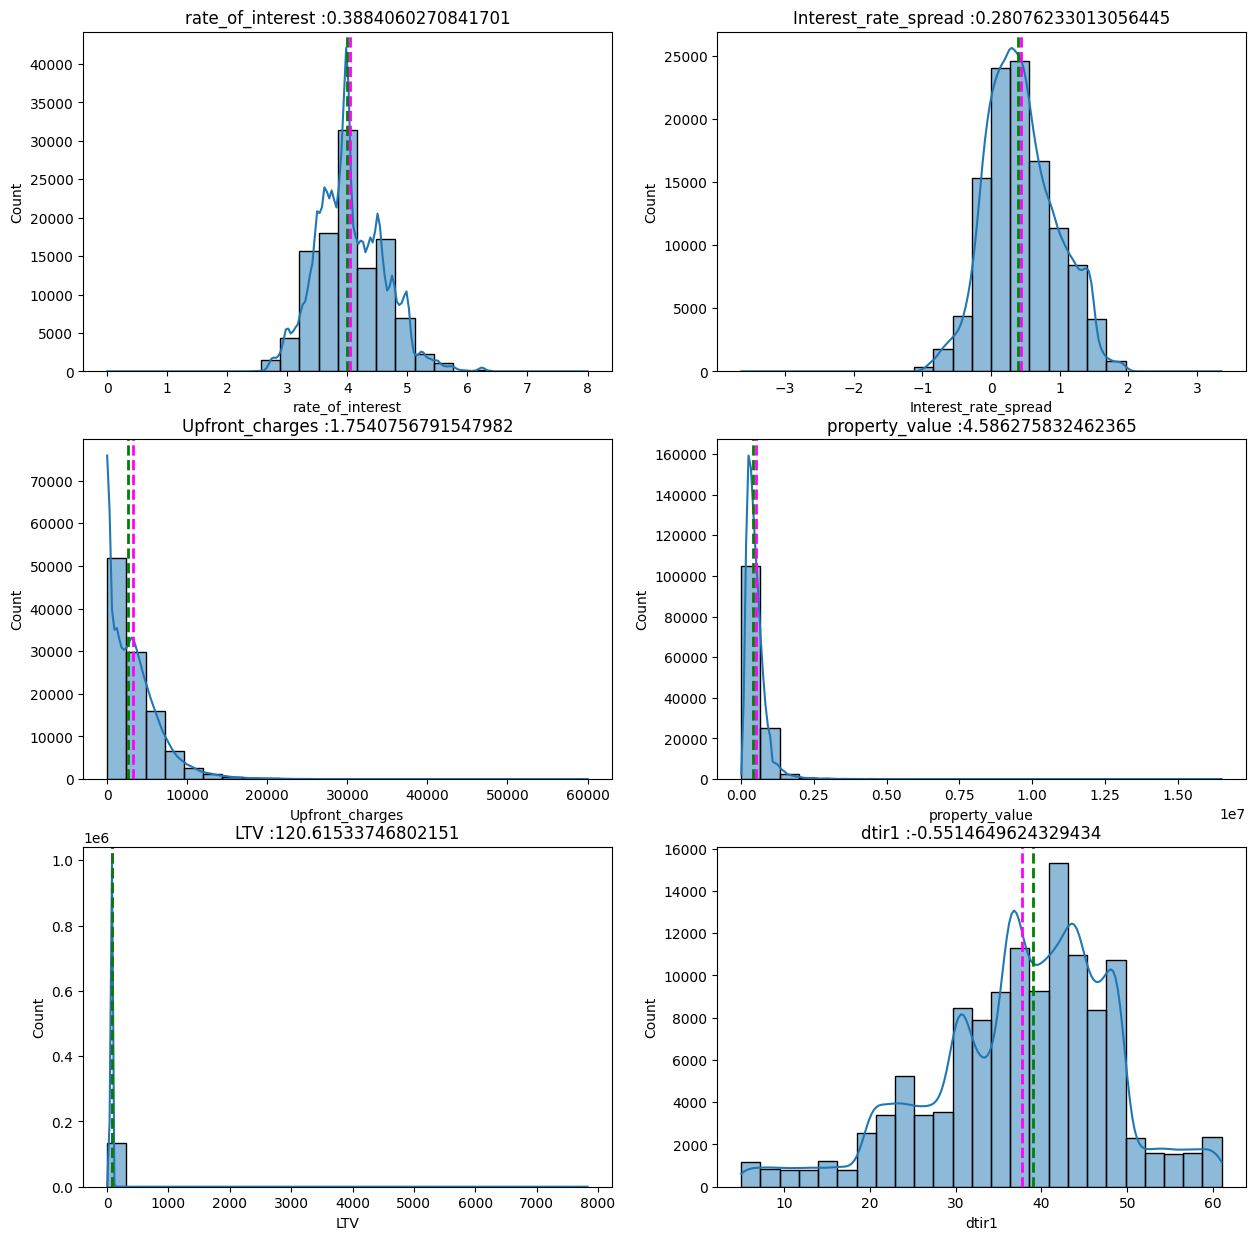

In [169]:
# Exploring the missing value in Size, ABV, Discount_Amount, and Discount_Percentage by checking their Histogram Plot
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])
ax = ax.flatten()

for i,j in enumerate(column) :
    sns.histplot(df[j], ax=ax[i], bins=25, kde=True)
    ax[i].axvline(df[j].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[i].axvline(df[j].median(), color='green', linestyle='dashed', linewidth=2)
    ax[i].set_title(f'{str(j)} :{df[j].skew()}')

Based on this plot, *rate of interest*, *interest rate spread*, and *dtir1* are distributed normally. On the other hand, *Upfront Charges*, *Property Value*, *LTV* are right skewed.

We will imputate the normally distributed with its median value.

In [170]:
obj_col = [col for col in column if df_cleaned[col].dtype=='object']
num_col = [col for col in column if df_cleaned[col].dtype!='object']

print(obj_col)
print(num_col)

[]
['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']


In [171]:
# Using Imputer to Fill the Missing Value with its mean value
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='median')

# Impute missing values in numeric columns using median strategy
df_cleaned[num_col] = impute.fit_transform(df_cleaned[num_col])


C:\Users\appsg\AppData\Local\Temp\ipykernel_20720\166987325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[num_col] = impute.fit_transform(df_cleaned[num_col])


## Outlier Data Handling

In [172]:
obj_col = [col for col in df_cleaned.columns if df_cleaned[col].dtype=='object']
num_col = [col for col in df_cleaned.columns if df_cleaned[col].dtype!='object']

print(obj_col)
print(num_col)

['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


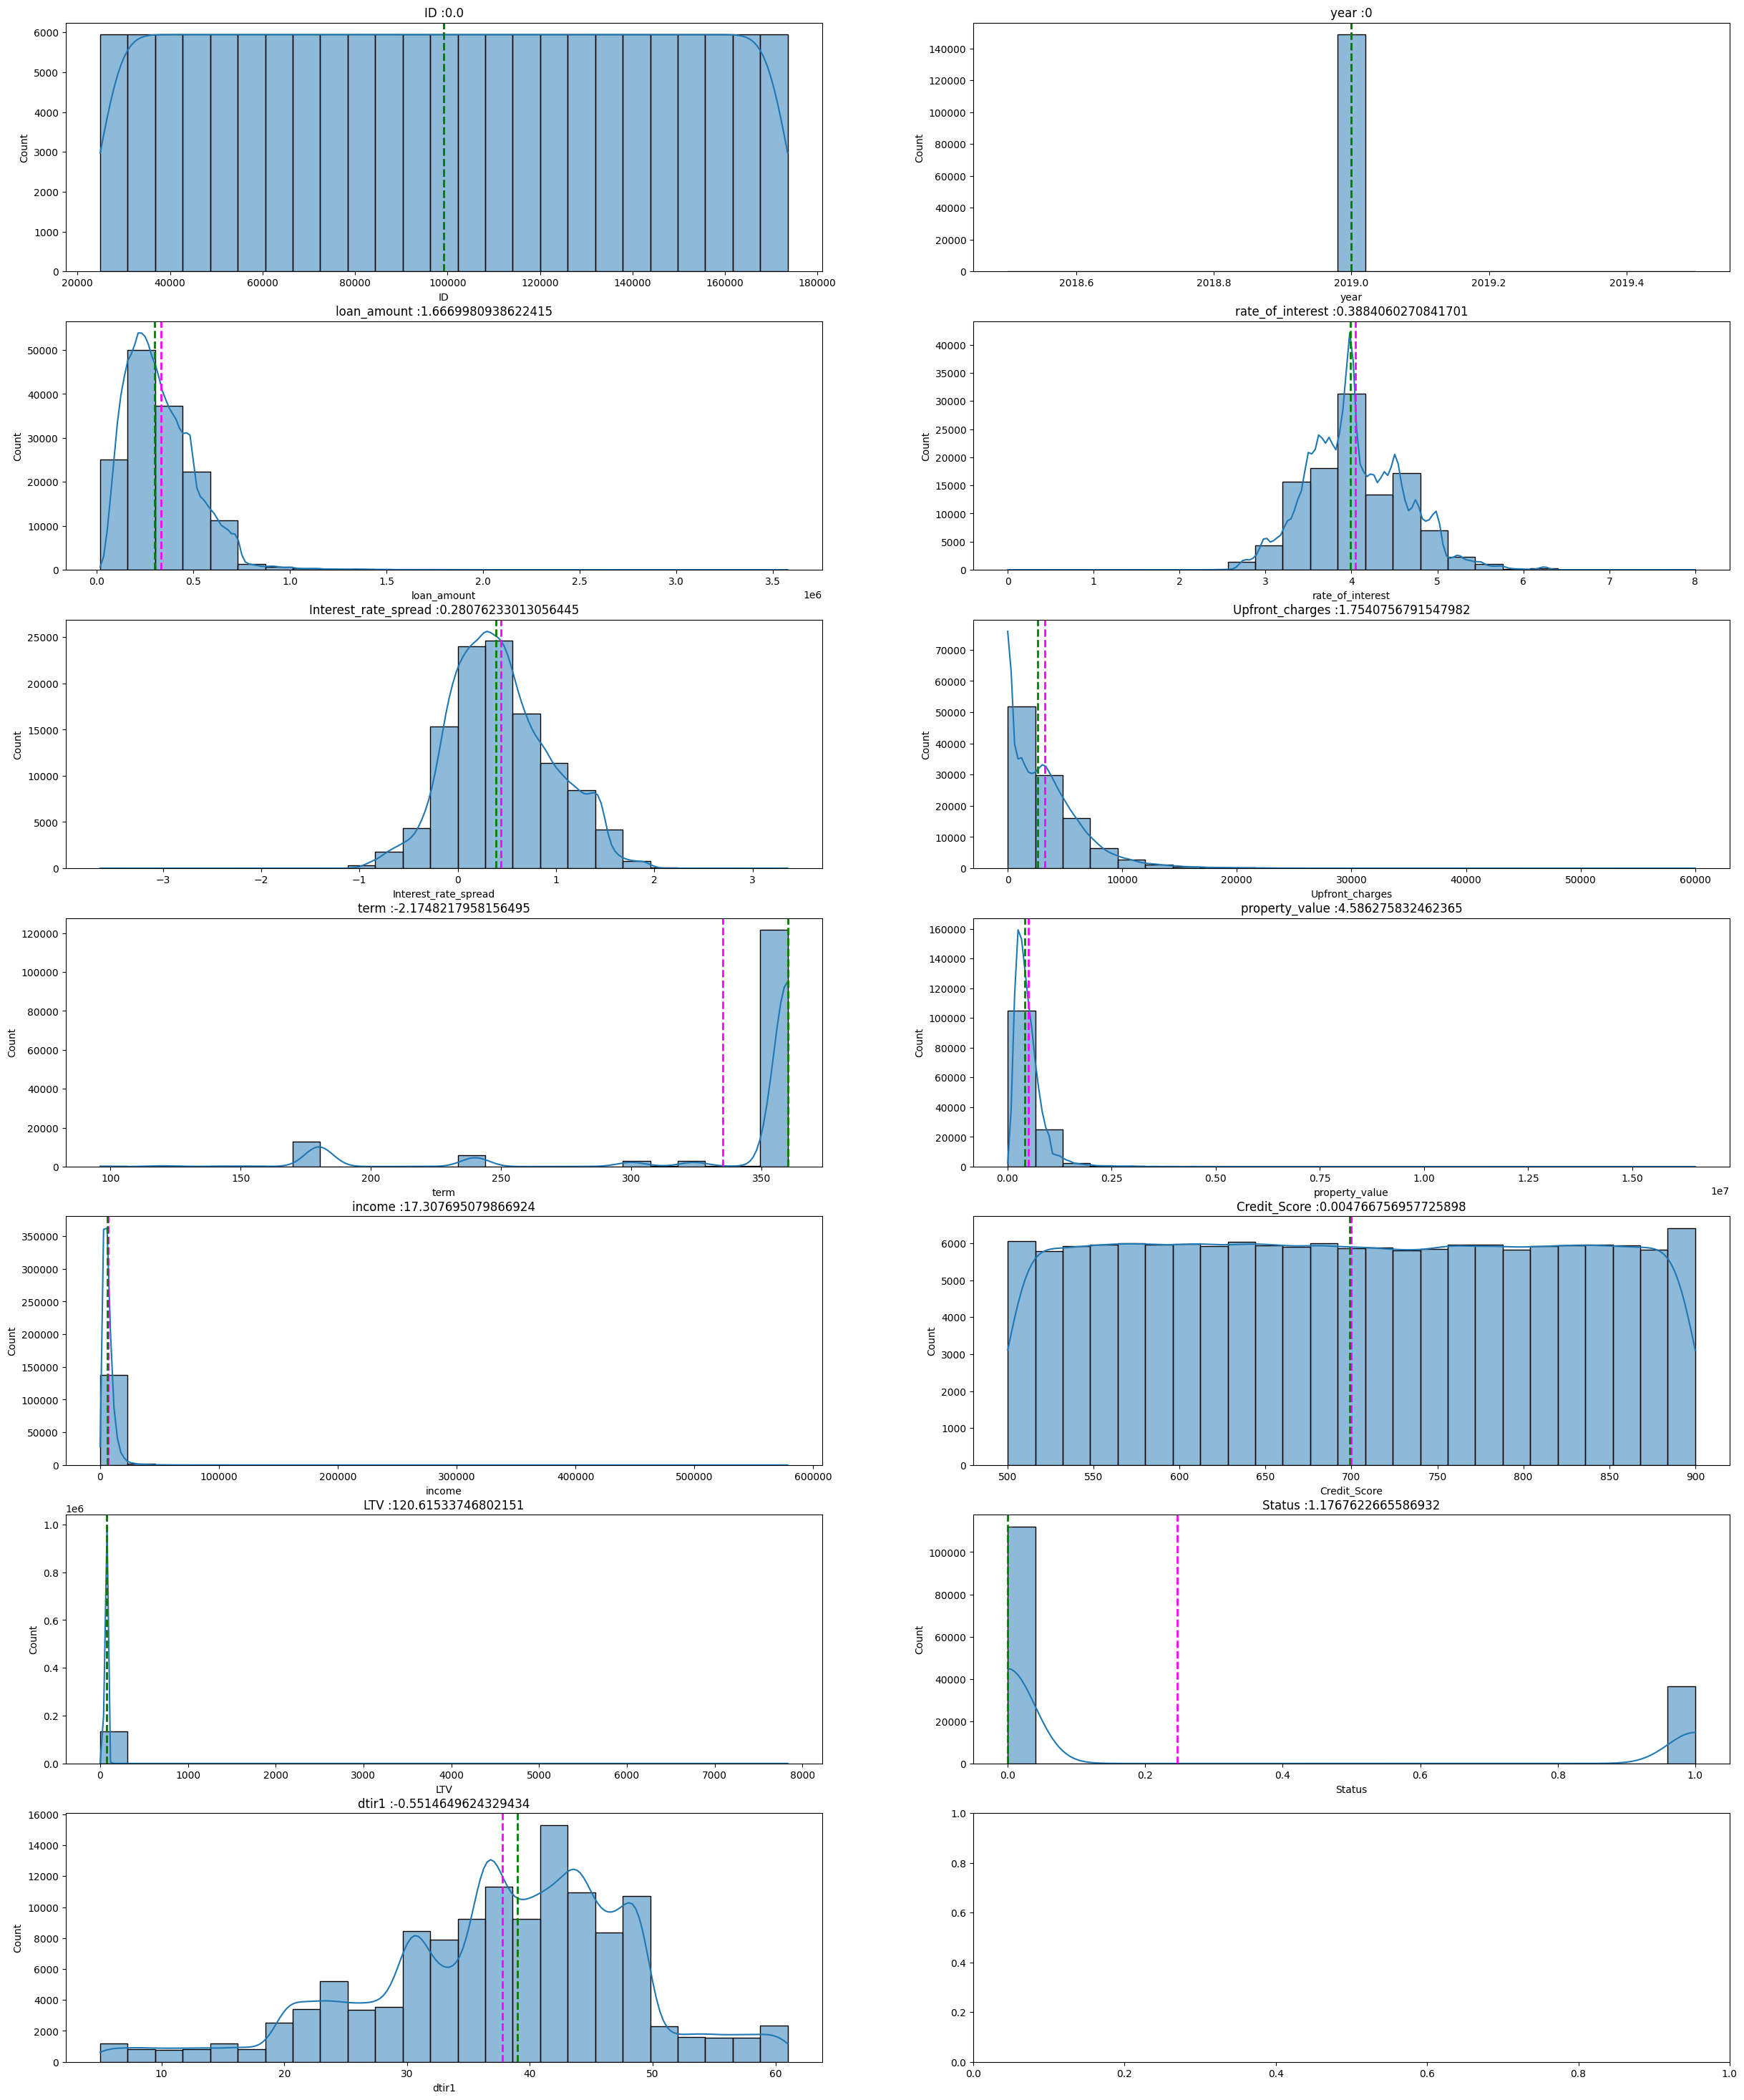

In [173]:
# Exploring the missing value in Size, ABV, Discount_Amount, and Discount_Percentage by checking their Histogram Plot
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=[30, 37])
ax = ax.flatten()

for i,j in enumerate(num_col) :
    sns.histplot(df[j], ax=ax[i], bins=25, kde=True)
    ax[i].axvline(df[j].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[i].axvline(df[j].median(), color='green', linestyle='dashed', linewidth=2)
    ax[i].set_title(f'{str(j)} :{df[j].skew()}')

From its skewness level, we will handle the outlier value by censoring it using the Gaussian Method into the outlier value.

In [174]:
def outlier_detect_gaussian(dataset, column):
    # Check skewness level
    print(f'Skewness level : {dataset[column].skew()}')
    # Check the IQR
    mean = dataset[column].mean()
    std = dataset[column].std()
    # Yielding the Upper & Lower Threshold
    upper_threshold = mean + (3*std)
    lower_threshold = mean - (3*std)
    # Considered Data Outlier
    outlier = dataset[(dataset[column] > upper_threshold) | (dataset[column] < lower_threshold)]
    # Check the amount of the outlier data
    print(f'Total data : {len(dataset[column])}')

    print(f'Data considered as outlier : {len(outlier)}')

    print(f'Percentage considered as outlier : {(len(outlier)/len(dataset[column]))*100}')

    return(upper_threshold, lower_threshold)

In [175]:
# Extracting the outlier info from the numerical column
for i in num_col :
    print(f'{i} outlier info:')
    outlier_detect_gaussian(df_cleaned, i)
    print('\n')

ID outlier info:
Skewness level : 0.002659962201532389
Total data : 135108
Data considered as outlier : 0
Percentage considered as outlier : 0.0


year outlier info:
Skewness level : 0
Total data : 135108
Data considered as outlier : 0
Percentage considered as outlier : 0.0


loan_amount outlier info:
Skewness level : 1.7162801143797624
Total data : 135108
Data considered as outlier : 1261
Percentage considered as outlier : 0.9333274121443585


rate_of_interest outlier info:
Skewness level : 0.6624840482896458
Total data : 135108
Data considered as outlier : 1431
Percentage considered as outlier : 1.0591526778577138


Interest_rate_spread outlier info:
Skewness level : 0.6741508197534527
Total data : 135108
Data considered as outlier : 736
Percentage considered as outlier : 0.5447493856766439


Upfront_charges outlier info:
Skewness level : 2.1790359986112806
Total data : 135108
Data considered as outlier : 2372
Percentage considered as outlier : 1.7556325310122274


term outlier info:

# EDA

In [176]:
df_cleaned.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,74.234694,North,direct,1,39.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


## Check the composition for the Status Target

[Text(0, 0, '100881'), Text(0, 0, '34227')]

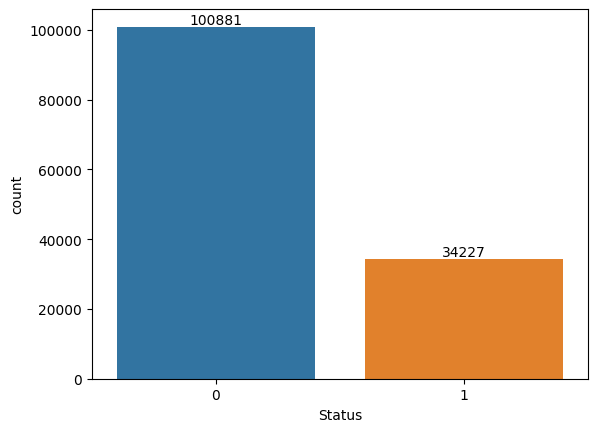

In [177]:
viz = sns.countplot(data=df_cleaned, x='Status')
viz.bar_label(viz.containers[0])

Based on this plot, we migh conclude that there is an imbalances of data target. It may distort the modelling result due to the imbalances, we might us SMOTE method in order to inferred the composition

## Check for composition of Male and Female ratio to the data target

[Text(0, 0, '9901'),
 Text(0, 0, '10363'),
 Text(0, 0, '7453'),
 Text(0, 0, '6510')]

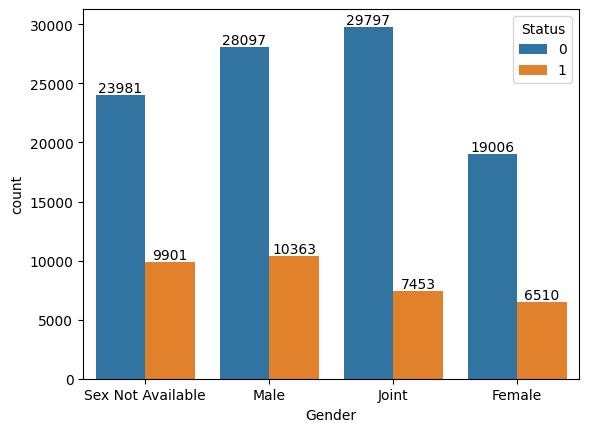

In [178]:
viz = sns.countplot(data=df_cleaned, x='Gender', hue='Status')
viz.bar_label(viz.containers[0])
viz.bar_label(viz.containers[1])

Based on the plot, the male dominates the occupancy of the data. But still, there are still uncategorized gender distributed along the data

## Check for composition of Age to the data target

[Text(0, 0, '3975'),
 Text(0, 0, '7944'),
 Text(0, 0, '6844'),
 Text(0, 0, '7828'),
 Text(0, 0, '5251'),
 Text(0, 0, '2022'),
 Text(0, 0, '363')]

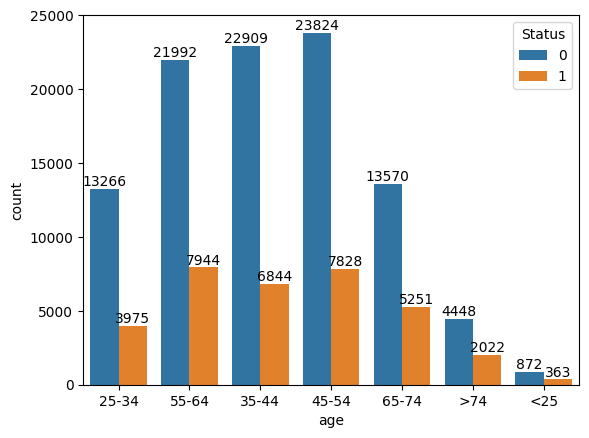

In [179]:
viz = sns.countplot(data=df_cleaned, x='age', hue='Status')
viz.bar_label(viz.containers[0])
viz.bar_label(viz.containers[1])

Top 3 three dominating age group are the :

1. 55-64

2. 35-44

3. 45-54

## Check for composition of Loan Type to the data target

[Text(0, 0, '24878'), Text(0, 0, '6272'), Text(0, 0, '3077')]

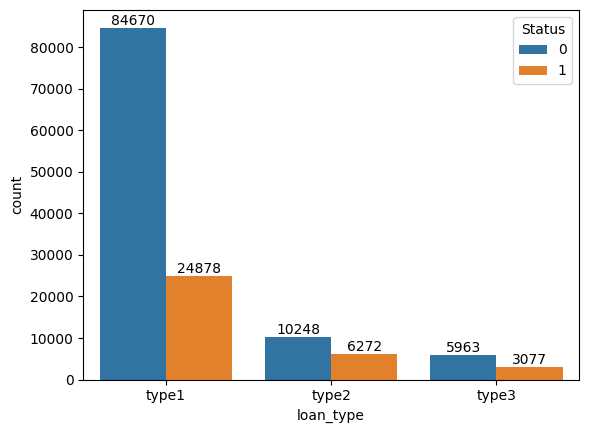

In [180]:
viz = sns.countplot(data=df_cleaned, x='loan_type', hue='Status')
viz.bar_label(viz.containers[0])
viz.bar_label(viz.containers[1])

# Feature Engineering

## Multicollinearity Check

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_mult = df_cleaned[num_col]
                   

# Multicollinearity test
def calc_vif(A):
    vif = pd.DataFrame()
    vif["variables"] = A.columns
    vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]
    return(vif)

calc_vif(df_mult)

,variables,VIF
0,ID,1.000141
1,year,193.165823
2,loan_amount,3.035141
3,rate_of_interest,1.865435
4,Interest_rate_spread,1.972126
5,Upfront_charges,1.048252
6,term,1.295545
7,property_value,3.417450
8,income,1.428923
9,Credit_Score,1.000104


Based on the multicollinearity result above, we might conclude that the column within the dataset are relatively independent and not suffered the multicollinearity issue

## Initial check with Phik Matrix

interval columns not set, guessing: ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


c:\Users\appsg\miniconda3\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable year for analysis 1. Dropping this column
  warnings.warn(


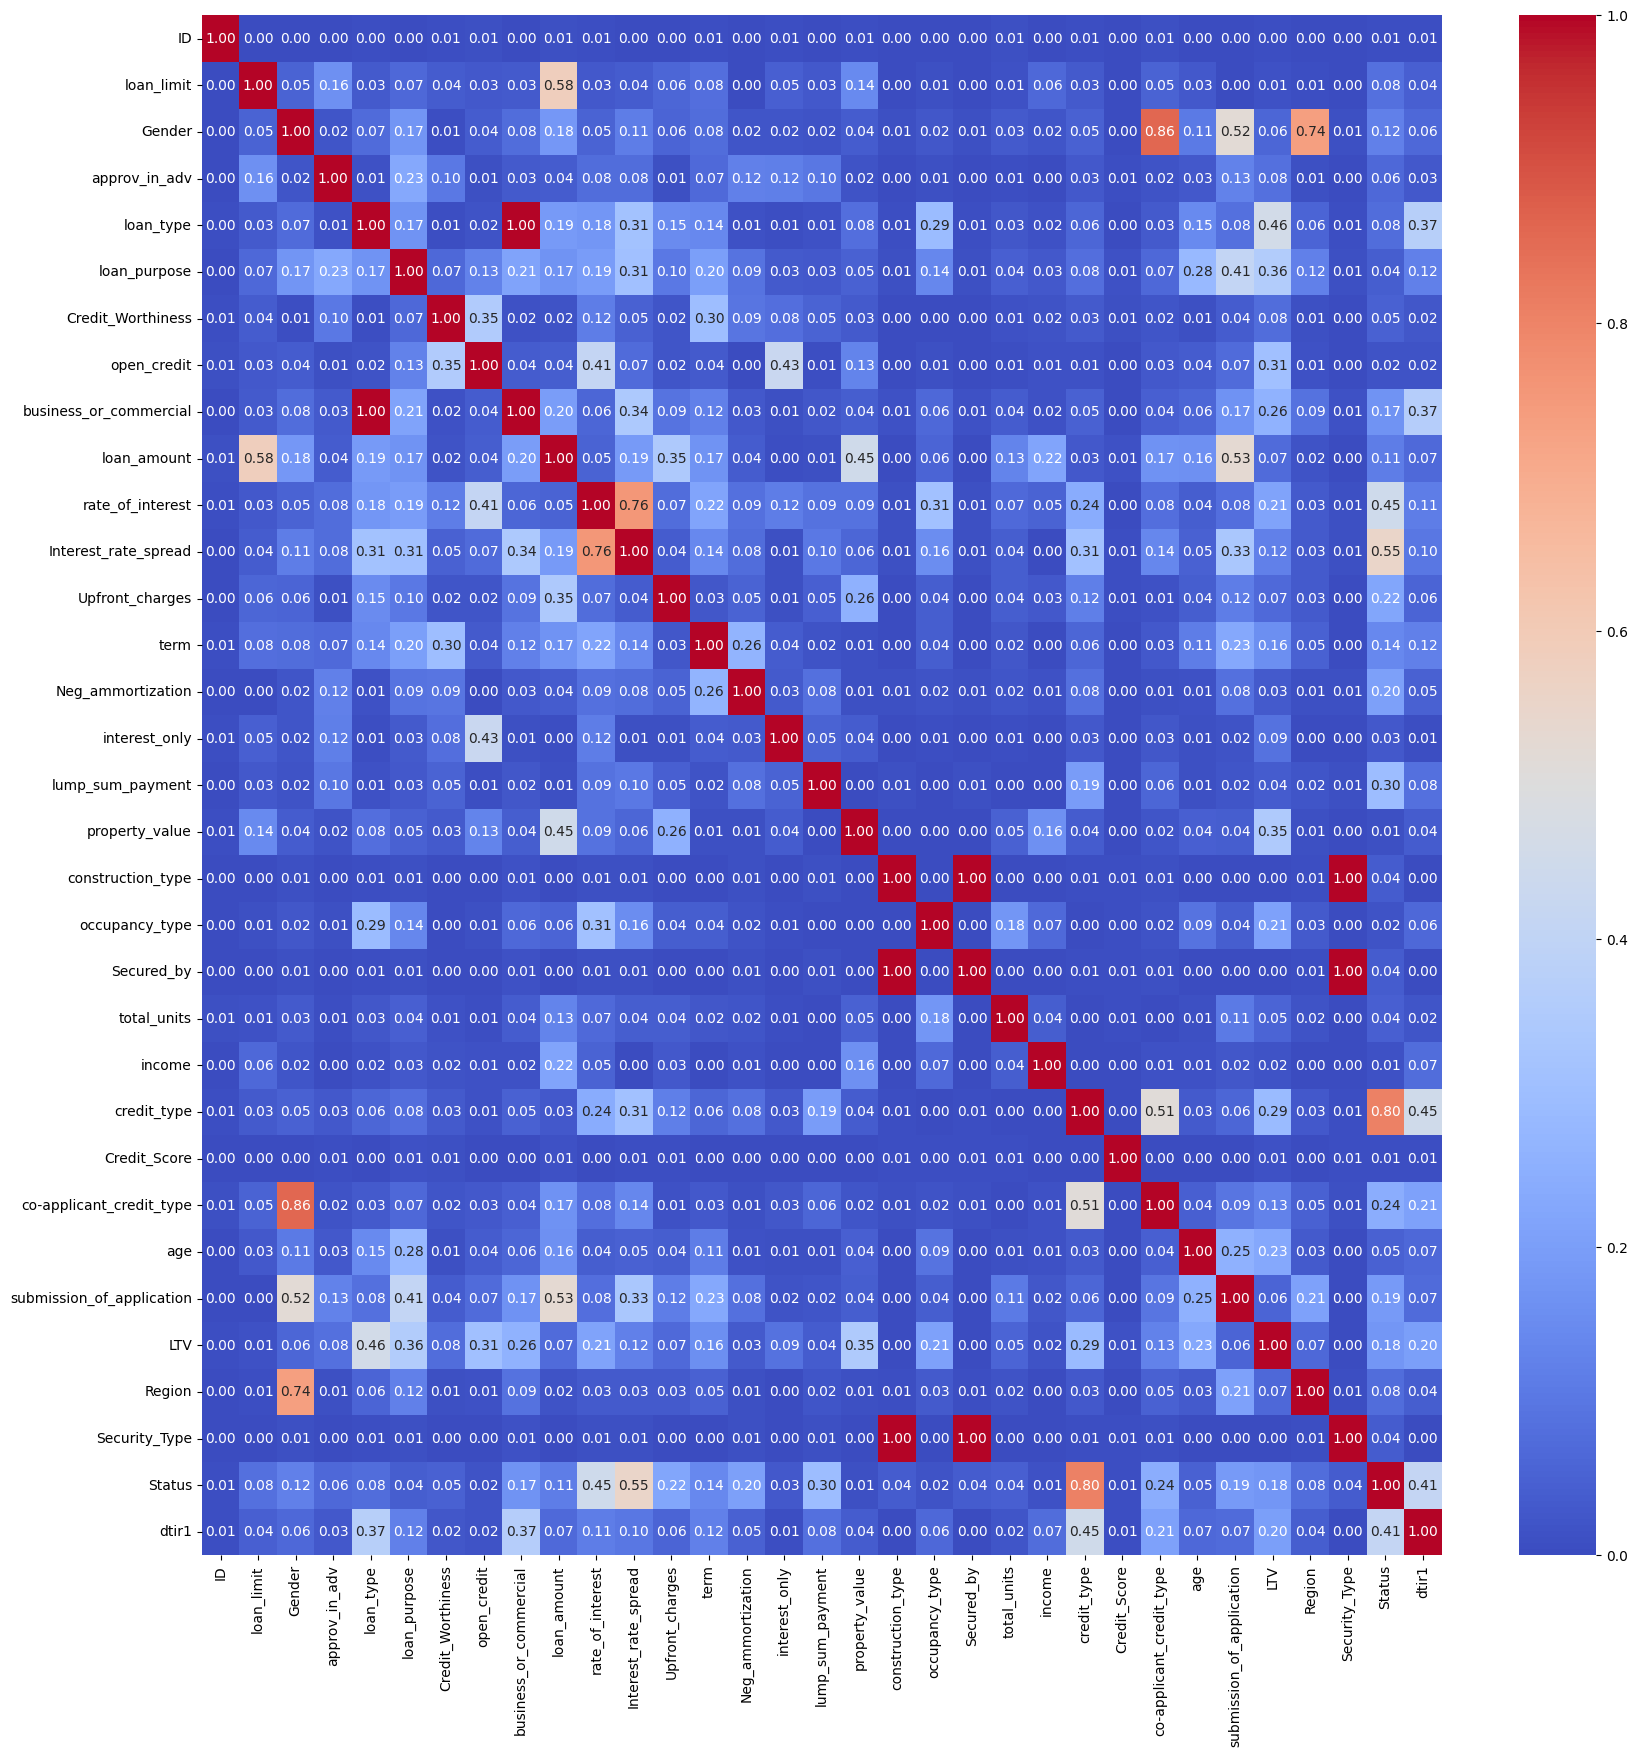

In [182]:
# Using phi-matrix to check the correlation of the categorical and the numerical features
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_cleaned.phik_matrix(), cmap='coolwarm', ax=ax, annot=True, fmt='.2f')
plt.show()

In [183]:
df_cleaned.phik_matrix().nlargest(15,'Status')['Status']

interval columns not set, guessing: ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


c:\Users\appsg\miniconda3\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable year for analysis 1. Dropping this column
  warnings.warn(


Status                       1.000000
credit_type                  0.804747
Interest_rate_spread         0.552147
rate_of_interest             0.447006
dtir1                        0.413853
lump_sum_payment             0.295395
co-applicant_credit_type     0.242563
Upfront_charges              0.221047
Neg_ammortization            0.204546
submission_of_application    0.190215
LTV                          0.177931
business_or_commercial       0.169383
term                         0.143382
Gender                       0.121796
loan_amount                  0.113940
Name: Status, dtype: float64

Based on the Phik Matrix above, there are several columns that highly correlated with the Status Value ( >=30% ):

1. rate_of_interest

2. interest_rate_spread

3. lump_sum_payment

4. credit_type

5. dtir1

In [184]:
feature = ['credit_type','Interest_rate_spread','rate_of_interest','dtir1','lump_sum_payment']
feat_target = feature + ['Status']

df_cleaned[feat_target].head()

,credit_type,Interest_rate_spread,rate_of_interest,dtir1,lump_sum_payment,Status
0,EXP,0.4020,3.99,45.0,not_lpsm,1
1,EQUI,0.4020,3.99,39.0,lpsm,1
2,EXP,0.2000,4.56,46.0,not_lpsm,0
3,EXP,0.6810,4.25,42.0,not_lpsm,0
4,CRIF,0.3042,4.00,39.0,not_lpsm,0


## Cardinality Handling

In [185]:
for col in feature :
    print(col + ':')
    print(df[col].value_counts())


credit_type:
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64
Interest_rate_spread:
-0.0280    77
-0.0380    64
-0.0230    60
-0.1730    56
-0.1480    52
           ..
-0.1791     1
 1.5268     1
 1.3850     1
 1.4201     1
-0.3247     1
Name: Interest_rate_spread, Length: 22516, dtype: int64
rate_of_interest:
3.990    14455
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: rate_of_interest, Length: 131, dtype: int64
dtir1:
37.0    6848
36.0    6553
44.0    6500
49.0    6309
43.0    5307
42.0    5121
41.0    4881
40.0    4699
39.0    4540
38.0    4461
45.0    4456
48.0    4405
30.0    4258
47.0    4236
31.0    4210
46.0    4112
35.0    2668
33.0    2655
32.0    2639
34.0    2588
20.0    2108
24.0    1817
29.0    1788
22.0    1781
28.0    1753
23.0    1740
26.0    1711
27.0    1675
25.0    1665
21.0    1617
60.0     832
54.0     832
57.0     82

Based on the result above, we will split the feature into two categories :

Categorical :
Credit_Type & lump_sum_payment

Numerical :
Interest_rate_spread,rate_of_interest,dtir1


In [186]:
# Copying dataset for modelling

data_model = df_cleaned[feat_target].copy()

In [187]:
df_cleaned.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

# Model Building

## Train Test Data Split

In [188]:
X = data_model.drop('Status', axis=1)
y = data_model['Status']

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29,stratify=y)

In [190]:
# Checking Shape of the train test data split
col = [X_train, X_test, y_train, y_test]

for i in col :
    print(f'{i.shape}')

(108086, 5)
(27022, 5)
(108086,)
(27022,)


## Pipeline

In [191]:
X_train.columns

Index(['credit_type', 'Interest_rate_spread', 'rate_of_interest', 'dtir1',
       'lump_sum_payment'],
      dtype='object')

In [192]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [193]:
numeric_features = ['Interest_rate_spread','rate_of_interest','dtir1']
numeric_transformer = Pipeline(
    steps=[("outlier", Winsorizer(capping_method='gaussian', tail='both', fold=1.5)), # Skewness <0.5, will be censorized with gaussian method
           ("scaler", StandardScaler())] # Because the distribution data for both numerical column are normal
)

categorical_features = ['credit_type']
categorical_transformer = OneHotEncoder(handle_unknown="ignore") # One hot encoding for the credit type column

ordinal_features = ['lump_sum_payment']
ord_transformer = OrdinalEncoder() # Ordinal Encoding for the Lump sum payment since they are categorical column

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("ord",ord_transformer,ordinal_features)
    ]
)

Pipeline for **Logistic Regression**

In [194]:
from sklearn.linear_model import LogisticRegression
logreg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

Pipeline **Naive Bayes**

In [195]:
from sklearn.naive_bayes import GaussianNB

naive = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", GaussianNB())]
)

Pipeline for **AdaBoost**

In [196]:
from sklearn.ensemble import AdaBoostClassifier
ada = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", AdaBoostClassifier())]
)

Pipeline for **Random Forrest**


In [197]:
from sklearn.ensemble import RandomForestClassifier
rand_for = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())]
)

## Cross Validation

Since the class within dataset is imbalance, we will do **Stratified K-Fold Cross Validation Technique** which specifically designed for datasets with class imbalance.

Stratified K-Fold Cross Validation takes into account the class distribution of the data, which helps to improve the performance estimate of the model.

We are going to find the scoring based on the "recall" value which emphasize more on false negative condition.

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
skfold=StratifiedKFold(n_splits=5)
# checking cross validation score
cv_log_model = cross_val_score(logreg, X_train, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(naive, X_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada, X_train, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rand_for, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_nb_model,cv_log_model,cv_ada_model,cv_rf_model],['nb_model','log_model','ada_model','rf_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

nb_model
recall - All - Cross Validation  :  [1. 1. 1. 1. 1.]
recall - Mean - Cross Validation :  1.0
recall - Std - Cross Validation  :  0.0
recall - Range of Test-Set       :  1.0 - 1.0
--------------------------------------------------
log_model
recall - All - Cross Validation  :  [0.46594851 0.46749452 0.46073776 0.46365961 0.47041636]
recall - Mean - Cross Validation :  0.46565135323184953
recall - Std - Cross Validation  :  0.00329549068975699
recall - Range of Test-Set       :  0.46235586254209254 - 0.4689468439216065
--------------------------------------------------
ada_model
recall - All - Cross Validation  :  [1. 1. 1. 1. 1.]
recall - Mean - Cross Validation :  1.0
recall - Std - Cross Validation  :  0.0
recall - Range of Test-Set       :  1.0 - 1.0
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [1. 1. 1. 1. 1.]
recall - Mean - Cross Validation :  1.0
recall - Std - Cross Validation  :  0.0
recall - Range of Test-Set       :  

**Conclusion:**

The dataset appears to have a high recall rate, as all the models have a recall rate of 1.0 in the cross-validation and test set.

The Naive Bayes model (nb_model) has the highest recall rate among all the models and it is also the best model based on the cross-validation mean score.

The Logistic Regression model (log_model) has a lower recall rate than the Naive Bayes model, but still has a reasonable performance, as its recall rate is between 0.461 and 0.470.

The AdaBoost and Random Forest models have the same recall rate as the Naive Bayes model, but it is unclear if they are equally good or if there are any trade-offs between them and the Naive Bayes model in terms of other performance metrics or computational requirements.

## Model Running

### Logistic Regression

Model score: 0.860
Train Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     80705
           1       0.96      0.47      0.63     27381

    accuracy                           0.86    108086
   macro avg       0.90      0.73      0.77    108086
weighted avg       0.87      0.86      0.84    108086

Test Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     20176
           1       0.96      0.47      0.63      6846

    accuracy                           0.86     27022
   macro avg       0.90      0.73      0.77     27022
weighted avg       0.88      0.86      0.84     27022

Confusion Matrix      : 


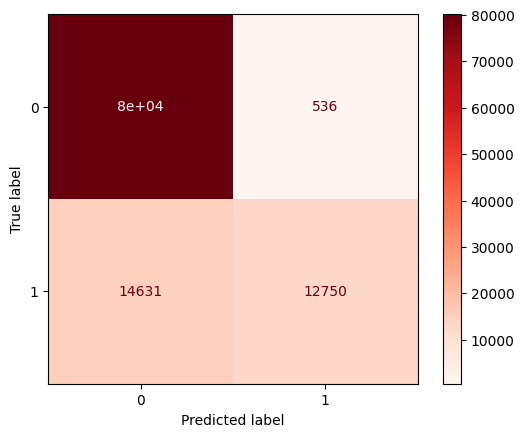

In [199]:
# Fit the Decision Tree function to train dataset
logreg.fit(X_train, y_train)
print("Model score: %.3f" % logreg.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

from sklearn.metrics import classification_report
print('Train Dataset:')
print('Classification Report : \n', classification_report(y_train, pred_train))

print('Test Dataset:')
print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, X_train, y_train, cmap='Reds'))

### Naive Bayes


Model score: 1.000
Train Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80705
           1       1.00      1.00      1.00     27381

    accuracy                           1.00    108086
   macro avg       1.00      1.00      1.00    108086
weighted avg       1.00      1.00      1.00    108086

Test Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20176
           1       1.00      1.00      1.00      6846

    accuracy                           1.00     27022
   macro avg       1.00      1.00      1.00     27022
weighted avg       1.00      1.00      1.00     27022

Confusion Matrix      : 


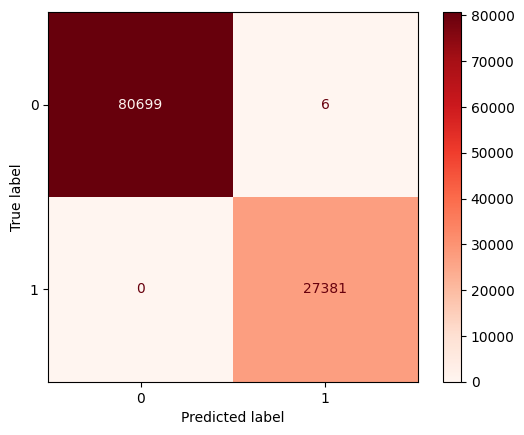

In [200]:
# Fit the Decision Tree function to train dataset
naive.fit(X_train, y_train)
print("Model score: %.3f" % naive.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = naive.predict(X_train)
pred_test = naive.predict(X_test)

from sklearn.metrics import classification_report
print('Train Dataset:')
print('Classification Report : \n', classification_report(y_train, pred_train))

print('Test Dataset:')
print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(naive, X_train, y_train, cmap='Reds'))

### AdaBoost

Model score: 1.000
Train Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80705
           1       1.00      1.00      1.00     27381

    accuracy                           1.00    108086
   macro avg       1.00      1.00      1.00    108086
weighted avg       1.00      1.00      1.00    108086

Test Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20176
           1       1.00      1.00      1.00      6846

    accuracy                           1.00     27022
   macro avg       1.00      1.00      1.00     27022
weighted avg       1.00      1.00      1.00     27022

Confusion Matrix      : 


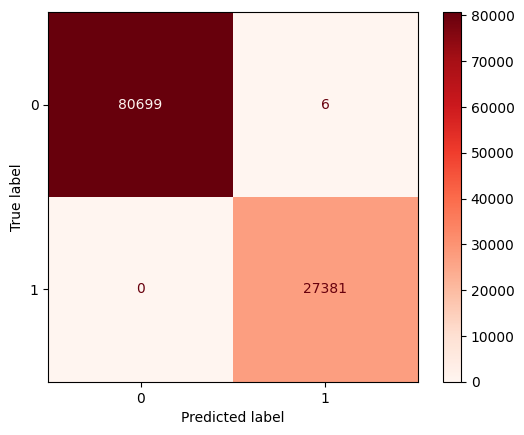

In [201]:
# Fit the Decision Tree function to train dataset
ada.fit(X_train, y_train)
print("Model score: %.3f" % ada.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = ada.predict(X_train)
pred_test = ada.predict(X_test)

from sklearn.metrics import classification_report
print('Train Dataset:')
print('Classification Report : \n', classification_report(y_train, pred_train))

print('Test Dataset:')
print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ada, X_train, y_train, cmap='Reds'))

### Random Forrest

Model score: 1.000
Train Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80705
           1       1.00      1.00      1.00     27381

    accuracy                           1.00    108086
   macro avg       1.00      1.00      1.00    108086
weighted avg       1.00      1.00      1.00    108086

Test Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20176
           1       1.00      1.00      1.00      6846

    accuracy                           1.00     27022
   macro avg       1.00      1.00      1.00     27022
weighted avg       1.00      1.00      1.00     27022

Confusion Matrix      : 


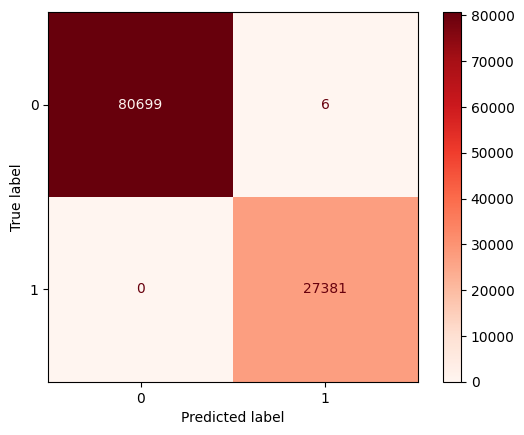

In [202]:
# Fit the Decision Tree function to train dataset
rand_for.fit(X_train, y_train)
print("Model score: %.3f" % rand_for.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = rand_for.predict(X_train)
pred_test = rand_for.predict(X_test)

from sklearn.metrics import classification_report
print('Train Dataset:')
print('Classification Report : \n', classification_report(y_train, pred_train))

print('Test Dataset:')
print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rand_for, X_train, y_train, cmap='Reds'))

In [203]:
# Fit the function svc to train dataset
rand_for.fit(X_train, y_train)
print("Model score: %.3f" % rand_for.score(X_test, y_test))

Model score: 1.000


In [204]:
pred_train_rand = rand_for.predict(X_train)
pred_test_rand = rand_for.predict(X_test)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20176
           1       1.00      1.00      1.00      6846

    accuracy                           1.00     27022
   macro avg       1.00      1.00      1.00     27022
weighted avg       1.00      1.00      1.00     27022

Confusion Matrix      : 


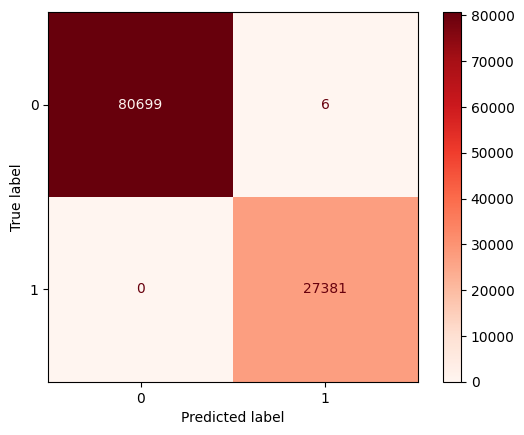

In [205]:
print('Classification Report : \n', classification_report(y_test, pred_test_rand))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rand_for, X_train, y_train, cmap='Reds'))

### Initial Conclusion :

1. Based on this finding, we might conclude that on the default tuning, Random Forrest, Naive Bayes, and Adaboost are respectively showing good result.

My hypothesis why the Logistic Regression data is not performing as best as the other three models :

Non-linear relationships: The Naive Bayes, Random Forest, and AdaBoost models can capture non-linear relationships between the input features and the target variable, while Logistic Regression assumes a linear relationship. If the true relationship is non-linear, Logistic Regression may not perform as well as these other models.

Feature interactions: Naive Bayes, Random Forest, and AdaBoost models can capture complex feature interactions, while Logistic Regression can only capture linear interactions. If there are important higher-order feature interactions in the data, Logistic Regression may not be able to capture them as well as these other models.

Onwards, we will be focusing to develop the **Random Forrest Model**

## Model Improvement

**Hyperparameter tuning will be using the GridSearchCV**

### Model Improvement for the Random Forrest

In [206]:
# Tuning Random Forrest Hyperparemeter
# Setting the parameter 
param_grid = {'classifier__max_depth': [5, 10, 20],
              'classifier__n_estimators': [10 , 50, 100],
              'classifier__criterion':['gini', 'entropy', 'log_loss']
              }

In [207]:
from sklearn.model_selection import GridSearchCV

grid_log_rand = GridSearchCV(rand_for, param_grid=param_grid, cv=5, scoring='recall')
grid_log_rand.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.3f}".format(grid_log_rand.best_score_))
print("Test set score: {:.2f}".format(grid_log_rand.score(X_test, y_test)))
print("Best parameters: {}".format(grid_log_rand.best_params_))  

Best cross-validation accuracy: 1.000
Test set score: 1.00
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__n_estimators': 50}


In [208]:
# Logistic Regression Best Parameter
grid_log_rand.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

## Applying Best Parameter to Model

### Random Forrest Modification

In [209]:
from sklearn.ensemble import RandomForestClassifier
rand_for_best = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(criterion='gini',max_depth=5, n_estimators=50))]
)

In [210]:
rand_for_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Interest_rate_spread',
                                                   'rate_of_interest',
                                                   'dtir1']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['credit_type']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['lump_sum_payment'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=50))])

#### Random Forrest Modifief Model Running

Model score: 1.000
Train Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80705
           1       1.00      1.00      1.00     27381

    accuracy                           1.00    108086
   macro avg       1.00      1.00      1.00    108086
weighted avg       1.00      1.00      1.00    108086

Test Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20176
           1       1.00      1.00      1.00      6846

    accuracy                           1.00     27022
   macro avg       1.00      1.00      1.00     27022
weighted avg       1.00      1.00      1.00     27022

Confusion Matrix      : 


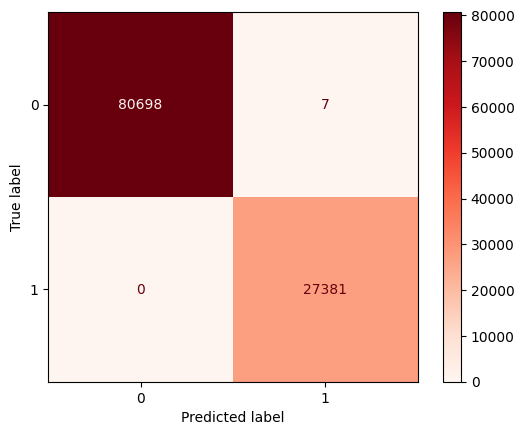

In [211]:
# Fit the Decision Tree function to train dataset
rand_for_best.fit(X_train, y_train)
print("Model score: %.3f" % rand_for_best.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = rand_for_best.predict(X_train)
pred_test = rand_for_best.predict(X_test)

from sklearn.metrics import classification_report
print('Train Dataset:')
print('Classification Report : \n', classification_report(y_train, pred_train))

print('Test Dataset:')
print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rand_for_best, X_train, y_train, cmap='Reds'))

## Conclusion for Final Model

### Random Forrest

Based on the classification reports for both the train and test datasets, it can be concluded that the model has performed extremely well on both datasets with a perfect score of 1.00 in precision, recall and f1-score for both classes (0 and 1) in both datasets.

Furthermore, the accuracy score of 1.00 on both the train and test datasets indicates that the model was able to correctly classify all instances in both datasets.

Overall, this suggests that the model is highly accurate and has learned the patterns and features of the data well, making it suitable for deployment on new, unseen data.

# Model Saving

In [212]:
# Saving Model Random_Forrest

with open('random.pkl', 'wb') as file_1 :
    joblib.dump(rand_for_best, file_1)